In [1]:
# Python_version 2.7.15

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [7]:
# Import electrophysiology data from .mat file
data = scipy.io.loadmat('R24E09_ArcLight_SING.mat')
R24E09_ArcLight_alldata = (data['alldata'])

In [8]:
# Import voltage imaging data from .npy files
time_2P = np.load('time.npy')
R24E09_scb_Ftrace_all = np.load('R24E09_scb_Ftrace_all.npy')
R24E09_scb_Ftrace_mean = np.load('R24E09_scb_Ftrace_mean.npy')
R24E09_scb_Ftrace_mean = np.transpose(R24E09_scb_Ftrace_mean)
R24E09_scb_Ftrace_all_mean = np.mean(R24E09_scb_Ftrace_all, axis=2)

In [9]:
dir = [0, 45, 90, 135, 180, 225, 270, 315, 360]

In [27]:
# Bring ephys data into same format as imaging data
time = np.linspace(-1,4,50001)
R24E09_ArcLight_meandata = np.mean(R24E09_ArcLight_alldata[10000:20000,:,:],0)

R24E09_ArcLight_meandata_align = np.empty([8,len(R24E09_ArcLight_alldata[0,0,:])])
R24E09_ArcLight_alldata_align = np.empty([50001,8,len(R24E09_ArcLight_alldata[0,0,:])])
for i in range(len(R24E09_ArcLight_alldata[0,0,:])):
    R24E09_ArcLight_meandata_align[:,i] = np.roll(R24E09_ArcLight_meandata[:,i],+2, axis=0)
    R24E09_ArcLight_alldata_align[:,:,i] = np.roll(R24E09_ArcLight_alldata[:,:,i],+1, axis=1)
    
R24E09_ArcLight_meandata_align = np.transpose(R24E09_ArcLight_meandata_align)
R24E09_ArcLight_alldata_align_mean = np.mean(R24E09_ArcLight_alldata_align[:,:,:], axis=2)

con = R24E09_ArcLight_meandata_align[:,0]
con = np.expand_dims(con, axis=1)
R24E09_ArcLight_meandata_align = np.concatenate((R24E09_ArcLight_meandata_align, con), axis = 1)

R24E09_ArcLight_meandata_align = np.flip(R24E09_ArcLight_meandata_align, axis=1)
R24E09_ArcLight_alldata_align_mean = np.flip(R24E09_ArcLight_alldata_align_mean, axis=1)

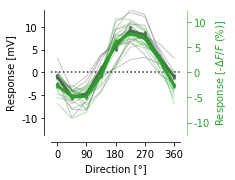

In [28]:
rotations = [0,45,90,135,180,225,270,315,360]
colors = sb.color_palette('husl')

fig = plt.figure(figsize = (2.3, 2.3))
ax = fig.add_subplot(111)

plt.plot(rotations, np.transpose(R24E09_ArcLight_meandata_align), color = '0.35', linewidth='1', alpha=0.35)
plt.plot(rotations, np.mean(R24E09_ArcLight_meandata_align, axis=0),
             color = '0.35', linewidth='2.5')
plt.errorbar(rotations, np.mean(R24E09_ArcLight_meandata_align, axis=0),yerr=stats.sem(R24E09_ArcLight_meandata_align, axis=0),
             color = '0.35', linewidth=2.5)

ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['right'].set_position(('outward', 7))

ax.set_ylabel('Response [mV]', size=10)
ax.set_xlabel(u'Direction [°]', size=10)
plt.xticks(rotations)
ax.set_xticklabels(rotations)
yticks = np.array([-10,-5,0,5,10])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
ymax = np.max(np.mean(R24E09_ArcLight_meandata_align, axis=0))
plt.ylim([-ymax*1.5, ymax*1.5])
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
xticks = np.array([0, 90, 180, 270, 360])
ax.set_xticks(xticks)
ax.set_xticklabels(('0', '90', '180', '270', '360'), size=10)

ax2 = ax.twinx()
ax2.plot(rotations, np.transpose(R24E09_scb_Ftrace_mean), color = 'C2', linewidth='1', alpha=0.35)
ax2.plot(rotations, np.mean(R24E09_scb_Ftrace_mean, axis=0),
             color = 'C2', linewidth='2.5')
ax2.errorbar(rotations, np.mean(R24E09_scb_Ftrace_mean, axis=0), yerr=stats.sem(R24E09_scb_Ftrace_mean, axis=0),
             color = 'C2', linewidth=2.5)

ymax2 = np.max(np.mean(R24E09_scb_Ftrace_mean,axis=0))
ax2.set_ylim([-ymax2*1.6, ymax2*1.6])
ax2.set_ylabel('Response [-$\Delta F/F$ (%)]', size=10, color = 'C2')
ax2.tick_params(axis='y', colors='C2')
ax2.spines['right'].set_color('C2')
ax2.spines["top"].set_visible(False)
ax2.spines['left'].set_position(('outward', 7))
ax2.spines['bottom'].set_position(('outward', 7))
ax2.spines['right'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(0.5)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax2.set_yticks(yticks)
ax2.set_yticklabels(('-10','-5','0','5','10'), size=10)

#plt.savefig('FigS1_R24E09_ArcLight_Ephys_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

slope: 0.009328 intercept: -0.007196 r_value : 0.987964


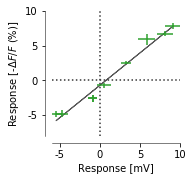

In [29]:
slope, intercept, r_value, p_value, std_err = \
    scipy.stats.linregress(np.mean(R24E09_ArcLight_meandata_align, axis=0), np.mean(R24E09_scb_Ftrace_mean, axis=0))
print("slope: %f intercept: %f r_value : %f" % (slope, intercept, r_value))

fig = plt.figure(figsize = (2.3, 2.3))
ax = fig.add_subplot(111)

#plt.plot(np.mean(R24E09_ArcLight_meandata_align, axis=0), np.mean(R24E09_scb_Ftrace_mean, axis=0), 'o', color='C2')
plt.errorbar(np.mean(R24E09_ArcLight_meandata_align, axis=0), np.mean(R24E09_scb_Ftrace_mean, axis=0),\
             xerr = stats.sem(R24E09_ArcLight_meandata_align, axis=0),
             yerr = stats.sem(R24E09_scb_Ftrace_mean, axis=0), fmt='none', color = 'C2')

plt.plot(np.mean(R24E09_ArcLight_meandata_align, axis=0),\
         intercept + slope*(np.mean(R24E09_ArcLight_meandata_align, axis=0)), color = '0.35', LineWidth = '1', zorder=0)

ax.axhline(y=0, color='0.2', linestyle=':')
ax.axvline(x=0, color='0.2', linestyle=':')
ax.set_ylabel('Response [-$\Delta F/F$ (%)]', size=10)
ax.set_xlabel('Response [mV]', size=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
yticks = np.array([-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-5','0','5','10'), size=10)
xticks = np.array([-5, 0, 5, 10])
ax.set_xticks(xticks)
ax.set_xticklabels(('-5','0','5','10'), size=10)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
plt.xlim([-6,10])
plt.ylim([-0.08,0.1])

#plt.savefig('FigS1_R24E09_ArcLight_Ephys_Regression.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [30]:
p_value

6.224037357217992e-07

In [17]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])

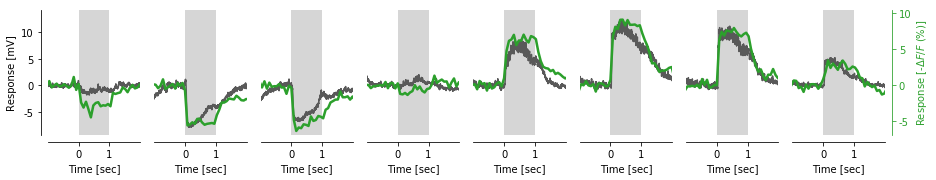

In [18]:
fig = plt.figure(figsize = (15, 2.3))
fig.subplots_adjust(wspace=0.15)

for i in range (0, 8):
    ax = fig.add_subplot(1, 8, i+1)
    
    ax.plot(time, (R24E09_ArcLight_alldata_align_mean[:,i]),color = '0.35', linewidth='1.5')
    plt.xlim([-1,2])
    plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
    ymax = np.max(R24E09_ArcLight_alldata_align_mean[:,5])
    ax.set_ylim([-ymax*0.75,ymax*1.15])
    yticks = np.array([-5, 0, 5, 10])
    ax.set_yticks(yticks)
    ax.set_yticklabels(('-5','0','5','10'), size=10)
    if i == 0:
        ax.set_ylabel('Response [mV]', size=10)
        ax.spines['left'].set_position(('outward', 7))
    if i in range(0,8):
        ax.spines["top"].set_visible(False)
        ax.set_xlabel('Time [sec]', size=10)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(('0', '1'), size=10)
        ax.spines['bottom'].set_position(('outward', 7))
    if i in range(1,8):
        ax.spines["left"].set_visible(False)
        ax.get_yaxis().set_visible(False) 
    if i in range(0,8):
        ax.spines["right"].set_visible(False) 
        

    ax2 = ax.twinx()
    ax2.plot(time_2P, (R24E09_scb_Ftrace_all_mean[:,i]),color = 'C2', linewidth='2.5')
    ymax2 = np.max(R24E09_scb_Ftrace_all_mean[:,5])
    ax2.set_ylim([-ymax2*0.75,ymax2*1.15])
    ax2.spines['right'].set_color('C2')
    ax2.tick_params(axis='y', colors='C2')
    yticks2 = np.array([-0.05,0,0.05,0.1])
    ax2.set_yticks(yticks2)
    ax2.set_yticklabels(('-5','0','5','10'), size=10)
    if i in range(0,8):
        ax2.spines["top"].set_visible(False)
        ax2.spines["left"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
    if i in range(0,7):
        ax2.spines["right"].set_visible(False)
        ax2.get_yaxis().set_visible(False)
    if i in range(1,8):
        ax.spines["left"].set_visible(False)
    if i == 7:
        ax2.set_ylabel('Response [-$\Delta F/F$ (%)]', size=10, color = 'C2')
        ax2.spines['right'].set_position(('outward', 7))
        
#plt.savefig('FigS1_R24E09_ArcLight_Traces_alldir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [19]:
MOI_flies_ephys = np.empty(len(R24E09_ArcLight_meandata_align))
for i in range(len(R24E09_ArcLight_meandata_align)):
    MOI_flies_ephys[i] = oct.MOI(rot_rad, R24E09_ArcLight_meandata_align[i,0:8])

D_magn =6.716008679138268   D_deg = 258.8273495174171
H_magn =8.64929559500908   H_deg = 254.2118762812022
MOI = 0.7739624369418437
D_magn =16.803776596746953   D_deg = 259.65455463501485
H_magn =12.945686523760745   H_deg = 270.62814745757737
MOI = 0.7563165846456592
D_magn =14.544257628244914   D_deg = 203.61276613143355
H_magn =5.848505850798432   H_deg = 209.77018283625748
MOI = 0.39979803128946406
D_magn =18.42582774020526   D_deg = 217.10686283473342
H_magn =5.83524833479691   H_deg = 234.7915816006231
MOI = 0.3017226347393507
D_magn =30.09095120348696   D_deg = 236.82332153998414
H_magn =16.308951166129546   H_deg = 241.30683715653987
MOI = 0.5403299973830296
D_magn =23.90969377313767   D_deg = 230.60651866149755
H_magn =12.361247201668009   H_deg = 233.60846704957984
MOI = 0.5162878559780549
D_magn =30.1660347275614   D_deg = 235.73688956548602
H_magn =16.0397935258255   H_deg = 239.8453547883979
MOI = 0.5303505994927047
D_magn =17.32270597132949   D_deg = 272.6358371129358
H_m

In [20]:
MOI_flies_scb = np.empty(len(R24E09_scb_Ftrace_mean))
for i in range(len(R24E09_scb_Ftrace_mean)):
    MOI_flies_scb[i] = oct.MOI(rot_rad, R24E09_scb_Ftrace_mean[i,0:8])

D_magn =0.24204254027008923   D_deg = 228.4923029712636
H_magn =0.19256710482844114   H_deg = 229.19296812734868
MOI = 0.7955324958189192
D_magn =0.14985067592517728   D_deg = 233.77133777711202
H_magn =0.09044576273980942   H_deg = 226.18467828985143
MOI = 0.5982891153719637
D_magn =0.18521671789037367   D_deg = 234.25139620524251
H_magn =0.14309481915955893   H_deg = 234.92357355856586
MOI = 0.772527305416209
D_magn =0.21695475491464947   D_deg = 230.30599085918323
H_magn =0.10993274225948421   H_deg = 227.16393688956836
MOI = 0.5059464188951625
D_magn =0.14267677823709934   D_deg = 233.8970614380635
H_magn =0.08366303962743382   H_deg = 231.10833457530688
MOI = 0.5856871803447931
D_magn =0.1348284319283532   D_deg = 253.96190983734007
H_magn =0.08620714348529143   H_deg = 251.40613530040562
MOI = 0.6387480065229145
D_magn =0.18104781312618146   D_deg = 235.24558518189596
H_magn =0.09916033353725372   H_deg = 243.9451169086084
MOI = 0.5414012155451101
D_magn =0.15913676447829042   D_

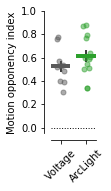

In [21]:
# Make Scatter Plot of MOI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [MOI_flies_ephys, MOI_flies_scb]
colors = ['0.35', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Voltage','ArcLight'), rotation=45, size=10)
ax.set_ylabel('Motion opponency index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('FigS1_R24E09_ArcLight_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [22]:
LDir_flies_ephys = np.empty(len(R24E09_ArcLight_meandata_align))
for i in range(len(R24E09_ArcLight_meandata_align)):
    LDir_flies_ephys[i] = oct.LDir(rot_rad, R24E09_ArcLight_meandata_align[i,0:8])

R_magn =15.353039867739842   R_deg = 256.2290951940956
R_indiv_magn = 18.65749287749287
LDir = 0.8228886897371245
R_magn =29.615456408856307   R_deg = 264.42764393368947
R_indiv_magn = 37.582360602360595
LDir = 0.788014800938186
R_magn =20.368685464038915   R_deg = 205.37763674214844
R_indiv_magn = 27.3103312983313
LDir = 0.7458234483330296
R_magn =24.050730448661472   R_deg = 221.3336014334386
R_indiv_magn = 33.156132682132686
LDir = 0.7253780372770081
R_magn =46.36752534624877   R_deg = 238.39890793437664
R_indiv_magn = 59.03125763125763
LDir = 0.7854741234870237
R_magn =36.25975751266665   R_deg = 231.62949355435623
R_indiv_magn = 49.66451444851444
LDir = 0.7300938691398251
R_magn =46.17891013884156   R_deg = 237.16284944134694
R_indiv_magn = 59.96055270655269
LDir = 0.7701548443831301
R_magn =27.293558148350776   R_deg = 270.48990476069275
R_indiv_magn = 38.087981277981314
LDir = 0.7165924061228521
R_magn =33.328427715900965   R_deg = 240.97360535049134
R_indiv_magn = 43.3002140822

In [23]:
LDir_flies_scb = np.empty(len(R24E09_scb_Ftrace_mean))
for i in range(len(R24E09_scb_Ftrace_mean)):
    LDir_flies_scb[i] = oct.LDir(rot_rad, R24E09_scb_Ftrace_mean[i,0:8])

R_magn =0.43460162612429226   R_deg = 228.80275362249475
R_indiv_magn = 0.5627356337258211
LDir = 0.7723015925734694
R_magn =0.2398021988312384   R_deg = 230.91706497665737
R_indiv_magn = 0.3153627721718311
LDir = 0.7604010999135238
R_magn =0.3283059817292308   R_deg = 234.54436470090613
R_indiv_magn = 0.42808328778967786
LDir = 0.7669208097900128
R_magn =0.3267777953162791   R_deg = 229.2494286387267
R_indiv_magn = 0.4293872673247675
LDir = 0.7610328022817695
R_magn =0.22627735284730335   R_deg = 232.8663182637907
R_indiv_magn = 0.31201528279676954
LDir = 0.7252124024792997
R_magn =0.22098326215655925   R_deg = 252.9651643310083
R_indiv_magn = 0.2755994863127442
LDir = 0.8018275545905492
R_magn =0.2794700642834629   R_deg = 238.32194593647384
R_indiv_magn = 0.39352041228708673
LDir = 0.7101793339238012
R_magn =0.24020389605679043   R_deg = 241.21914247295925
R_indiv_magn = 0.30950310880650334
LDir = 0.7760952611528121
R_magn =0.2741546862632231   R_deg = 234.5137434981413
R_indiv_magn

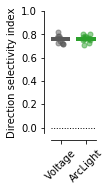

In [24]:
# Make Scatter Plot of MOI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [LDir_flies_ephys, LDir_flies_scb]
colors = ['0.35', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Voltage','ArcLight'), rotation=45, size=10)
ax.set_ylabel('Direction selectivity index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

#plt.savefig('FigS1_R24E09_ArcLight_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [25]:
print(stats.shapiro(MOI_flies_ephys))
print(stats.shapiro(MOI_flies_scb))
print(stats.levene(MOI_flies_ephys, MOI_flies_scb))
print(stats.ttest_ind(MOI_flies_ephys, MOI_flies_scb, equal_var=True))

(0.9344518184661865, 0.49307766556739807)
(0.9404909014701843, 0.4632907509803772)
LeveneResult(statistic=0.34911129472245794, pvalue=0.5609227449003027)
Ttest_indResult(statistic=-1.2482323070975585, pvalue=0.2256843456606744)


In [26]:
print(stats.shapiro(LDir_flies_ephys))
print(stats.shapiro(LDir_flies_scb))
print(stats.levene(LDir_flies_ephys, LDir_flies_scb))
print(stats.ttest_ind(LDir_flies_ephys, LDir_flies_scb, equal_var=True))

(0.9223345518112183, 0.3768385052680969)
(0.9533432722091675, 0.6496947407722473)
LeveneResult(statistic=2.0242954244789026, pvalue=0.1694867166603373)
Ttest_indResult(statistic=-0.5566988990600054, pvalue=0.5836178223632009)
